<a href="https://colab.research.google.com/github/shindejayesh987/Deep-Learning-Using-Pytorch/blob/main/Fashion_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [2]:
for gpu in gpus:
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [4]:
ds = tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteMVLRIP/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteMVLRIP/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next()['label']

2

In [6]:
import numpy as np

In [7]:
dataIterator = ds.as_numpy_iterator()

In [8]:
dataIterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

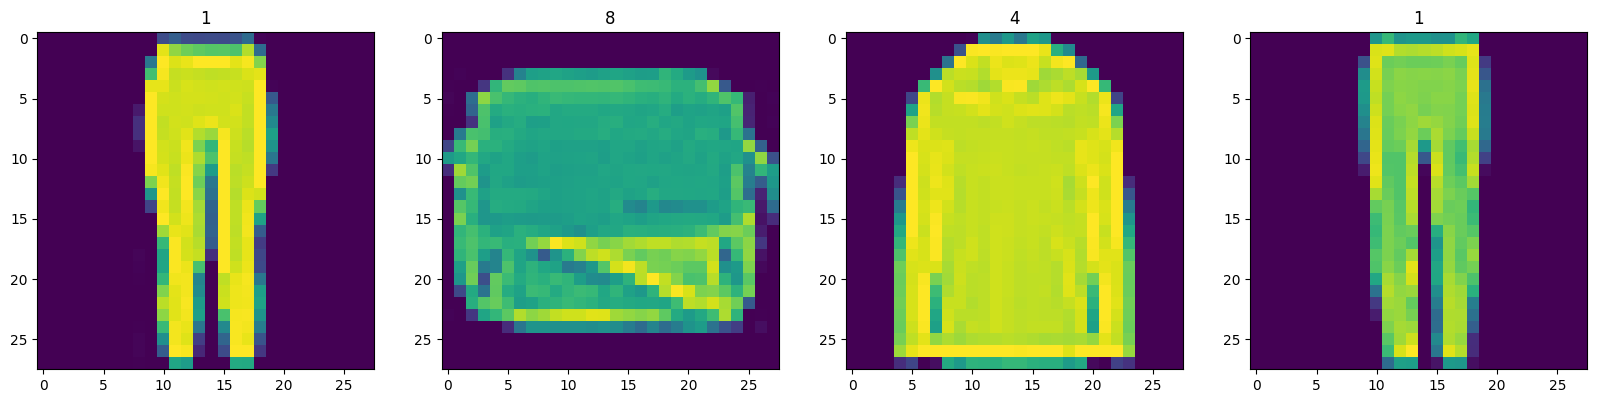

In [9]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  sample = dataIterator.next()
  ax[idx].imshow(np.squeeze(sample['image']))
  ax[idx].title.set_text(sample['label'])


In [10]:
def scale_images(data):
  image = data['image']
  return image / 255


In [11]:
#ds = tfds.load('fashion_mnist',split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [12]:
ds.as_numpy_iterator().next()

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [13]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense,Flatten,Reshape,LeakyReLU,Dropout, UpSampling2D

In [15]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128,input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))


  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1,4,padding = 'same',activation = 'sigmoid'))


  return model

In [16]:
test_model = build_generator()

In [17]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [18]:
generator = build_generator()

In [19]:
img = generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 2s 2s/step


array([[[[0.4978576 ],
         [0.49517983],
         [0.50266373],
         ...,
         [0.50842637],
         [0.50321704],
         [0.502066  ]],

        [[0.49311772],
         [0.48206148],
         [0.4891304 ],
         ...,
         [0.504354  ],
         [0.49614775],
         [0.50131315]],

        [[0.49056566],
         [0.47831422],
         [0.48157367],
         ...,
         [0.49564746],
         [0.48752326],
         [0.5020228 ]],

        ...,

        [[0.49240437],
         [0.48774788],
         [0.49835378],
         ...,
         [0.49897322],
         [0.49444574],
         [0.5036152 ]],

        [[0.4974935 ],
         [0.4922438 ],
         [0.4957819 ],
         ...,
         [0.50127435],
         [0.49867755],
         [0.50710166]],

        [[0.4955845 ],
         [0.49591443],
         [0.49602106],
         ...,
         [0.49757683],
         [0.49991342],
         [0.50431687]]],


       [[[0.49751592],
         [0.49620414],
         [0.50

In [28]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 19ms/step


(4, 28, 28, 1)

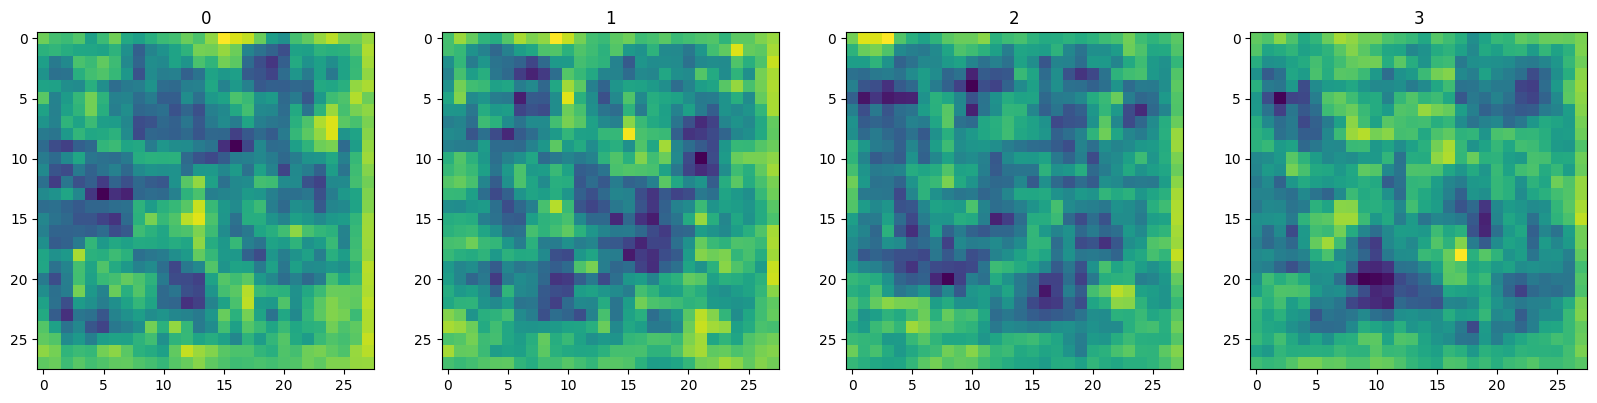

In [21]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
  sample = dataIterator.next()
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)


In [22]:
def build_discriminator():
  model = Sequential()

  model.add(Conv2D(32,5,input_shape = (28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))


  model.add(Conv2D(64,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(128,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Conv2D(256,5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation = 'sigmoid'))



  return model

In [23]:
discriminator = build_discriminator()

In [24]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [29]:
img = img[0]

In [30]:
img.shape

(28, 28, 1)

In [32]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 16ms/step


array([[0.51202524]], dtype=float32)

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [34]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()



In [35]:
from tensorflow.keras.models import Model

In [36]:
class FashionGAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)


    self.generator = generator
    self.discriminator = discriminator


  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self,batch):
    real_images = batch
    fake_images = self.generator(tf.random.normal((128,128,1)),training = False)


    with tf.GradientTape() as d_tape:

      y_hat_real = self.discriminator(real_images,training = True)
      y_hat_fake = self.discriminator(fake_images,training = True)
      y_hat_realfake = tf.concat([y_hat_real,y_hat_fake],axis = 0)


      y_realfake = tf.concat([tf.zeros_like(y_hat_real),tf.ones_like(y_hat_fake)],axis = 0)

      noise_real = 0.15*tf.random.uniform(tf.shape(y_hat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(y_hat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis = 0)

      total_d_loss = self.d_loss(y_realfake,y_hat_realfake)

    dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))


    with tf.GradientTape() as g_tape:

      gen_images = self.generator(tf.random.normal((128,128,1)),training = True)


      predicted_labels = self.discriminator(gen_images,training = False)

      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)


    ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))


    return {"d_loss":total_d_loss,"g_loss":total_g_loss}





In [37]:
fashgan = FashionGAN(generator,discriminator)


In [38]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [39]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [45]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        # Ensure the 'images' directory exists
        if not os.path.exists('images'):
            os.makedirs('images')

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images = generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [46]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [53]:
hist = fashgan.fit(ds, epochs=50, callbacks=[ModelMonitor()])

Epoch 1/50
  6/469 [..............................] - ETA: 1:18 - d_loss: 0.7049 - g_loss: 0.6555

469/469 [==============================] - 81s 172ms/step - d_loss: 0.6924 - g_loss: 0.6358
Epoch 2/50
469/469 [==============================] - 80s 171ms/step - d_loss: 0.6962 - g_loss: 0.6388
Epoch 3/50
469/469 [==============================] - 80s 170ms/step - d_loss: 0.6930 - g_loss: 0.6433
Epoch 4/50
469/469 [==============================] - 80s 172ms/step - d_loss: 0.6957 - g_loss: 0.6498
Epoch 5/50
469/469 [==============================] - 80s 171ms/step - d_loss: 0.6932 - g_loss: 0.6416
Epoch 6/50
469/469 [==============================] - 80s 170ms/step - d_loss: 0.6954 - g_loss: 0.6549
Epoch 7/50
469/469 [==============================] - 80s 170ms/step - d_loss: 0.6098 - g_loss: 0.5942
Epoch 8/50
469/469 [==============================] - 80s 170ms/step - d_loss: 0.4434 - g_loss: 0.0832
Epoch 9/50
469/469 [==============================] - 80s 170ms/step - d_loss: 0.7053 - g_loss: 0.6236
Epoch 10/50
469/469 [==============================] - 80s 170ms/step - d_loss: 0.68

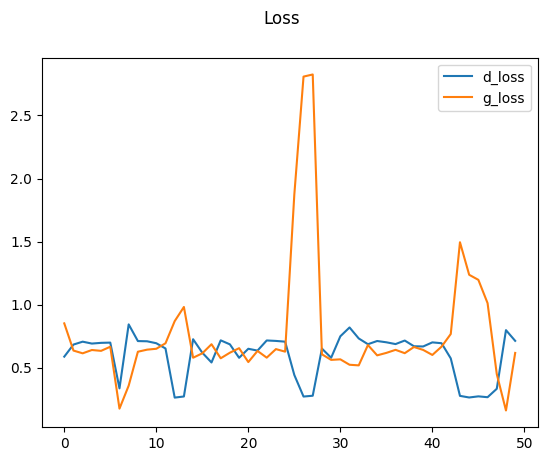

In [54]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'],label='d_loss')
plt.plot(hist.history['g_loss'],label= 'g_loss')
plt.legend()
plt.show()

In [55]:
imgs = generator.predict(tf.random.normal((16,128,1)))
imgs

1/1 [==============================] - 0s 28ms/step


array([[[[1.99786350e-02],
         [1.29451416e-03],
         [3.04096233e-04],
         ...,
         [2.13008020e-02],
         [4.65145782e-02],
         [1.36396135e-04]],

        [[1.99999660e-03],
         [4.62725089e-04],
         [2.46957643e-03],
         ...,
         [5.36528789e-03],
         [5.18334925e-01],
         [3.97952186e-04]],

        [[2.16067065e-06],
         [1.33639446e-07],
         [2.08631013e-06],
         ...,
         [2.15531350e-03],
         [3.90780419e-01],
         [1.90308958e-04]],

        ...,

        [[3.14954996e-01],
         [3.62807035e-01],
         [4.21392322e-01],
         ...,
         [6.92182046e-04],
         [5.68231568e-04],
         [2.70399236e-04]],

        [[2.03939825e-01],
         [1.93648934e-01],
         [2.42091328e-01],
         ...,
         [7.72277999e-04],
         [2.77061365e-03],
         [4.64528380e-03]],

        [[3.72219756e-02],
         [1.07063465e-02],
         [9.51184146e-03],
         ...,
 

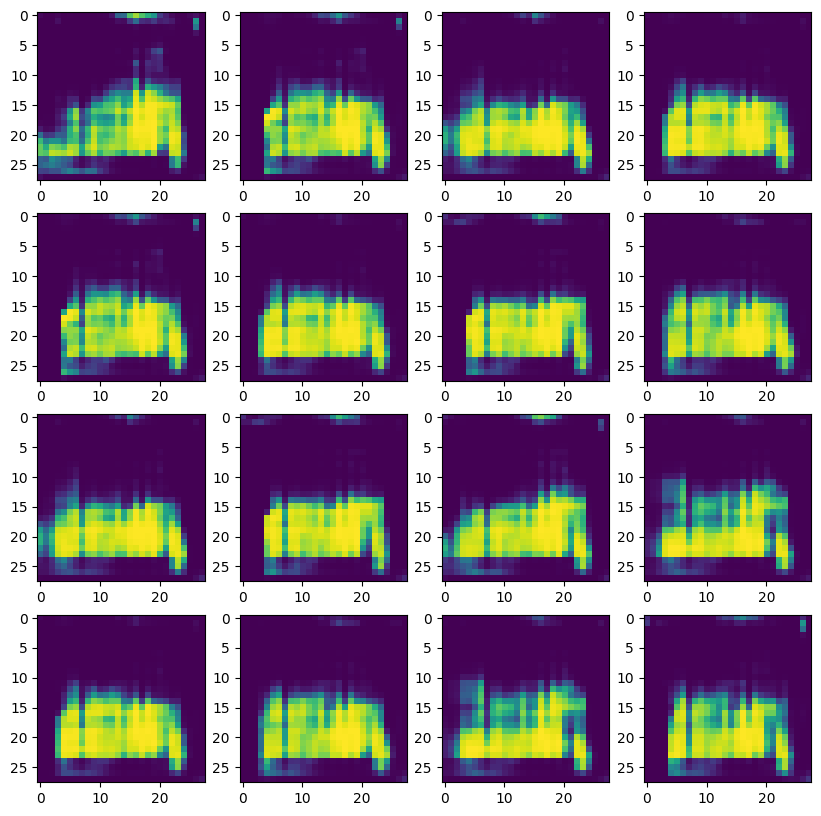

In [56]:
fig, ax = plt.subplots(ncols=4,nrows =4,figsize = (10,10))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [57]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
